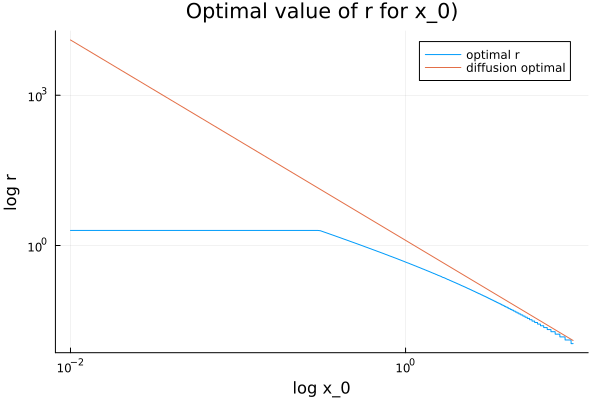

In [2]:
using Plots
using LaTeXStrings

D = 1/2
v_0 = 1
γ = v_0^2/2D
λ(r, n) = sqrt(r*(r+2γ*n)/(v_0^2*n))

get_T(x_0=1, n=1) = r -> -1/r + 2γ*n/r * (exp(λ(r, n)*x_0)/(r+2γ*n - sqrt(r*(r+2γ*n))))


diffusion_min = x_0 -> 2.53962 * D / (x_0^2)

x_i = range(0.01, 10, 1000)
r_i = range(0.001, 2, 1000)
T_i = get_T.(x_i)
r_optimal = [argmin(T, r_i) for T in T_i]

plot(x_i, r_optimal, label="optimal r", xscale=:log10, yscale=:log10, title="Optimal value of r for x_0)", ylabel="log r", xlabel="log x_0")
plot!(x_i, diffusion_min.(x_i), label="diffusion optimal")
#plot!(x_i, x_i.^-1, label="x^-1", linestyle=:dash)

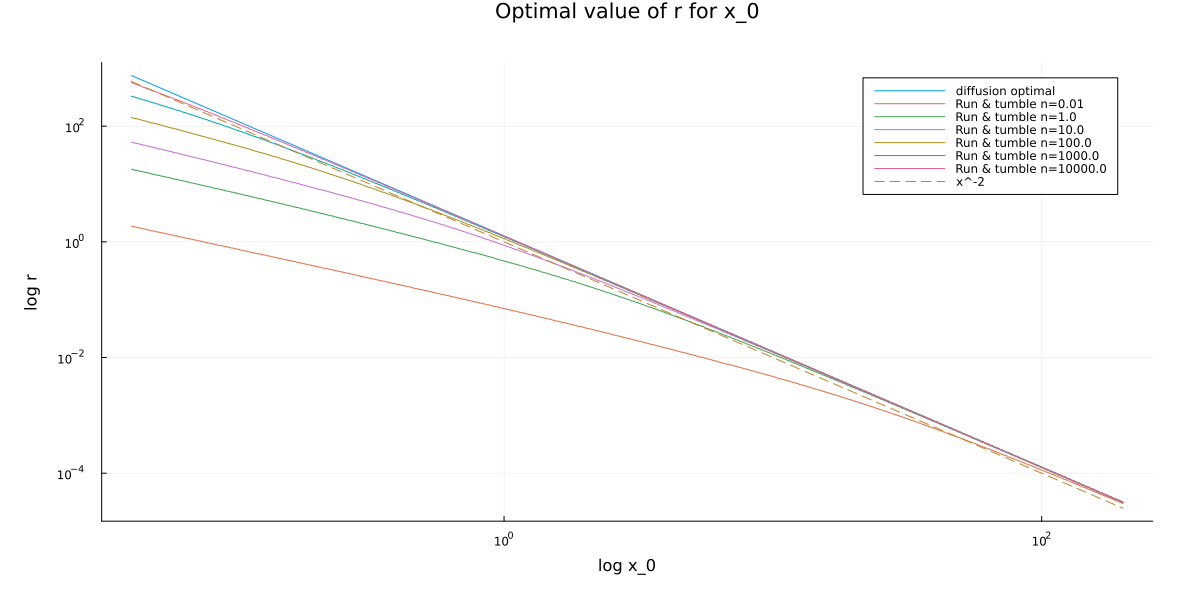

In [3]:
x_i = 10 .^(range(log(.25), log(10), 1000))
r_i = 10 .^ (range(log(0.002), log(25), 1000))
T_i = get_T.(x_i)
r_optimal = [argmin(T, r_i) for T in T_i]

plt = plot(x_i, diffusion_min.(x_i), label="diffusion optimal", 
    xscale=:log10, yscale=:log10, title="Optimal value of r for x_0", ylabel="log r", xlabel="log x_0",
    size=(1200, 600), margin=10Plots.mm
    )

for n in [0.01, 1, 10, 100, 1000, 10^4]
    T_i_n = get_T.(x_i, n)
    optimal = [argmin(T, r_i) for T in T_i_n]
    plot!(x_i, optimal, label="Run & tumble n=$n")
end

#plot!(x_i, x_i.^-22, label="x^-22", linestyle=:dash)
plot!(x_i, x_i.^-2, label="x^-2", linestyle=:dash)

plt

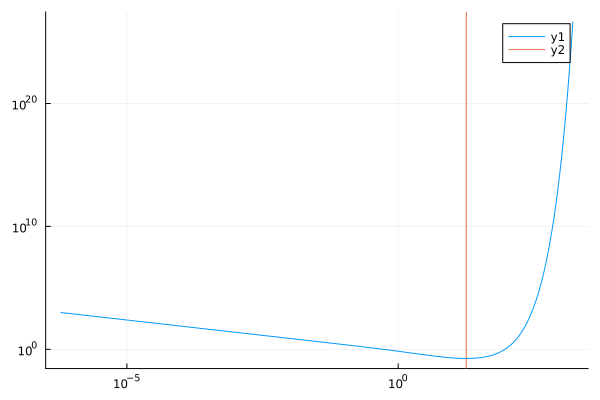

In [4]:
T_i = get_T.(x_i)
optimal = [argmin(T, r_i) for T in T_i][1:5]

plot(r_i, T_i[1], yscale=:log10, xscale=:log10)
vline!([optimal[1]])

x_0=0.3 minimised by r=2.062626262626263 
x_0=0.4 minimised by r=1.4474747474747476 
x_0=0.5 minimised by r=1.1252525252525252 
x_0=0.6 minimised by r=0.8909090909090909 
x_0=0.7 minimised by r=0.7444444444444445 


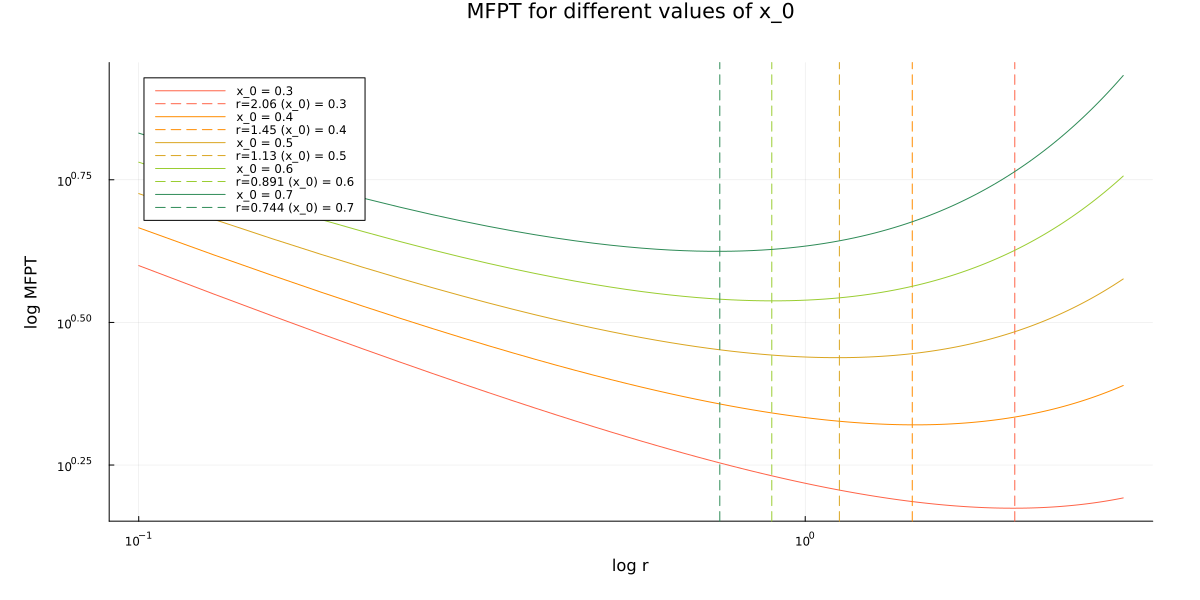

In [ ]:
T_1 = get_T()
x_j = range(0.1, 3, 100)
plt = plot(xscale=:log10, yscale=:log10, title="MFPT for different values of r", ylabel="log MFPT", xlabel="log r", size=(1200, 600), margin=10Plots.mm)
for i ∈ range(1, 5)
    x = [.3, .4, .5, .6, .7][i]
    col = [:tomato, :darkorange, :goldenrod, :yellowgreen, :seagreen][i]
    T_x = get_T(x)
    plot!(x_j, T_x, label="x_0 = $x", c=col)
    min_r = argmin(T_x, x_j)
    rounded = round(min_r, sigdigits=3)
    vline!([min_r], label="r=$rounded (x_0) = $x", c=col, linestyle=:dash)
    print("x_0=$x minimised by r=$min_r \n")
end
plt

In [1]:
r_0 = 1
x_0 = 0
T_from_n = n -> get_T(x_0, n)(r_0)

n_i = 10 .^ (range(log(0.01), log(1000), 1000))


plt = plot(xscale=:log10, yscale=:log10, title="\nMFPT for different values of n", ylabel="log MFPT", xlabel="log n",
    size=(1200, 600), margin=10Plots.mm, topmargin=10Plots.mm, xticks=10.0 .^(-10:1:7), yticks=10.0 .^(-10:1:10))
plot!(n_i, T_from_n, label="MFPT for run-and-tumble particle given n")
plot!([x for x in n_i if x > 1], x -> x^-0.5, linestyle=:dash, label="x^-1/2")
annotate!(100000, 0.1, L"r = 1, D = 1/2"*'\n'*L"v_0 = \sqrt{n}/2, \gamma = v_0^2")

UndefVarError: UndefVarError: `Plots` not defined